# CUSTOMER CHURN ANALYSIS

customer churn helps company predict which customers are likely to churn due to different factors. The data set sets contains historical data of bank customers with different observations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
url = './curn_data/Churn_Modelling.csv'

df = pd.read_csv(url)

data = df.copy()

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.isnull().any().any() #check for missing values

False

In [8]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [10]:
data[['NumOfProducts']].value_counts() #returns the occurrance of NumOfProducts values

NumOfProducts
1                5084
2                4590
3                 266
4                  60
dtype: int64

In [11]:
data[['HasCrCard']].value_counts() #returns the occurrance of HasCrCard values

HasCrCard
1            7055
0            2945
dtype: int64

In [12]:
data[['IsActiveMember']].value_counts()  #returns the occurrance of IsActiveMember values

IsActiveMember
1                 5151
0                 4849
dtype: int64

In [13]:
data[['Exited']].value_counts() #returns the occurrance of Exited values

Exited
0         7963
1         2037
dtype: int64

# Data visualization

## By Gender

In [14]:
data[['Gender']].value_counts()

Gender
Male      5457
Female    4543
dtype: int64

<AxesSubplot:title={'center':'Males and Females'}, xlabel='Gender', ylabel='count'>

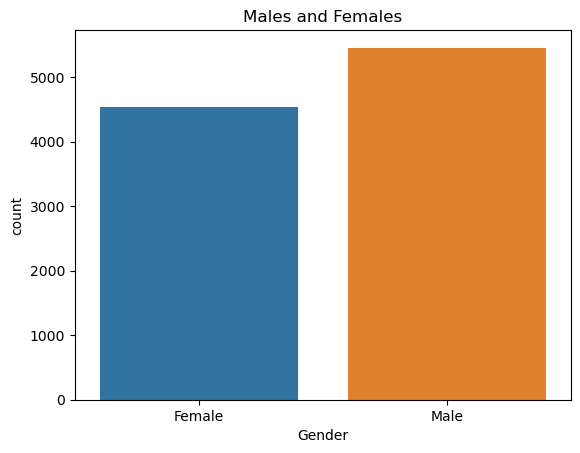

In [15]:
plt.title("Males and Females")
sns.countplot(x=data.Gender, data=data)

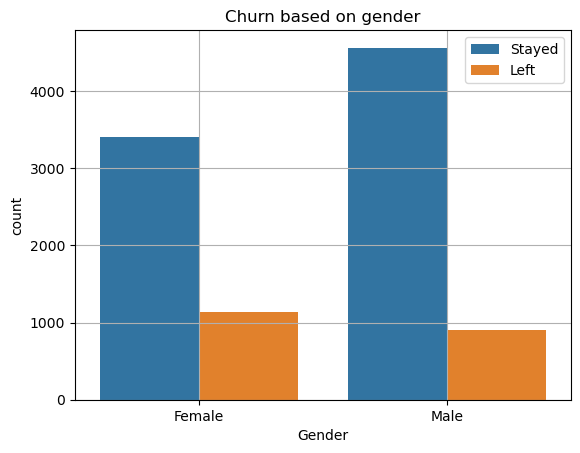

In [16]:
plt.title("Churn based on gender")
sns.countplot(x=data.Gender, hue=data.Exited, data=data)
plt.legend(["Stayed", "Left"])
plt.grid()
plt.show()

## By Geography

In [17]:
data[['Geography']].value_counts()

Geography
France       5014
Germany      2509
Spain        2477
dtype: int64

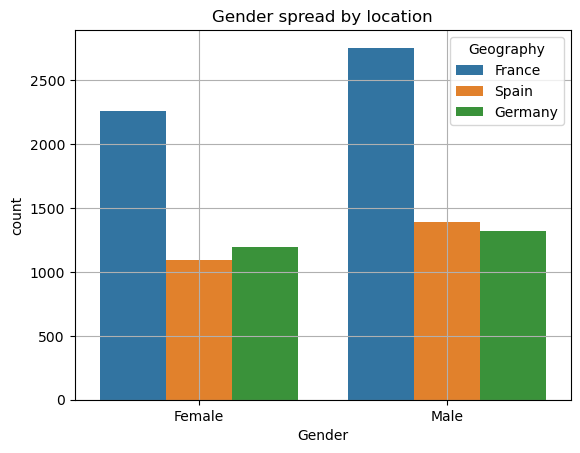

In [18]:
plt.title("Gender spread by location")
sns.countplot(x=data.Gender, hue=data.Geography, data=data)
plt.grid()
plt.show()

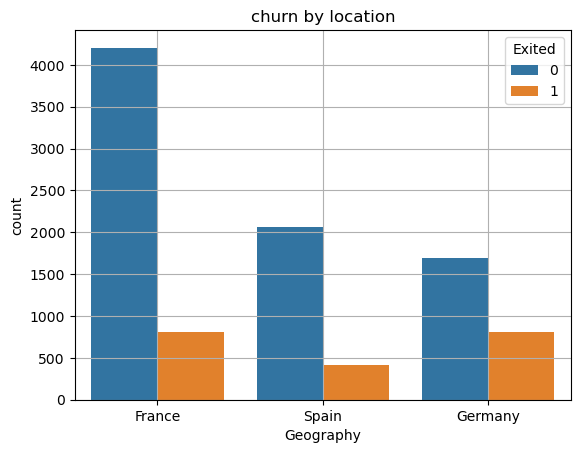

In [19]:
plt.title("churn by location")
sns.countplot(x=df.Geography, hue=df.Exited, data=df)
plt.grid()
plt.show()

In [20]:
#creat age category
bins = list(range(15,110,  15))
data["age_cat"] = pd.cut(data.Age, bins=bins, labels=["15-30", "30-45", "45-60", "60-75", "75-90", "90-105"])

In [21]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-45
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-45
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-45


In [22]:
data.shape

(10000, 12)

Visualize distribution for france customers

In [23]:
france_data = data[data['Geography'] == 'France'].copy() #copies data corresping to france

france_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-45
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,45-60
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,30-45


In [24]:
france_data.shape

(5014, 12)

In [25]:
france_data[['Geography']].value_counts()

Geography
France       5014
dtype: int64

In [26]:
france_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-45
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,45-60
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,30-45


In [27]:
france_data[['Gender']].value_counts() #gender for france customers

Gender
Male      2753
Female    2261
dtype: int64

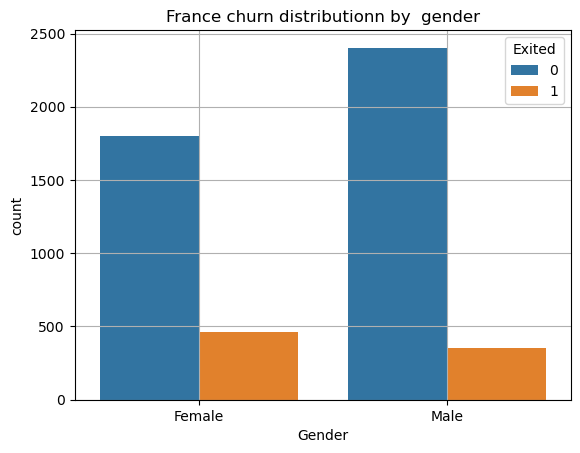

In [28]:
plt.title("France churn distributionn by  gender")
sns.countplot(x=france_data.Gender, hue=france_data.Exited, data=france_data)
plt.grid()
plt.show()

In [29]:
france_data[['age_cat']].value_counts() #age category for france customers

age_cat
30-45      2996
15-30      1038
45-60       749
60-75       206
75-90        23
90-105        2
dtype: int64

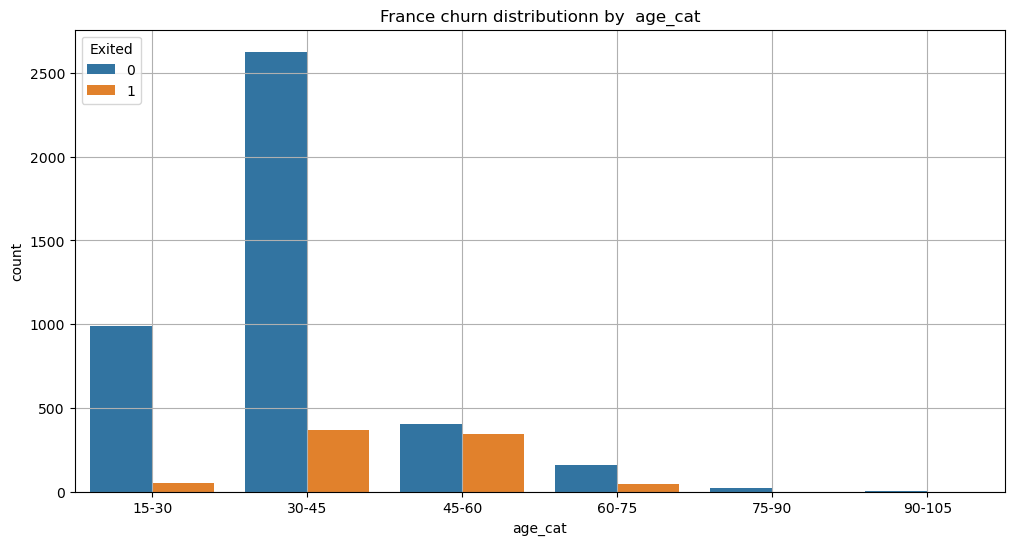

In [30]:
plt.figure(figsize=(12, 6))  

plt.title("France churn distributionn by  age_cat")
sns.countplot(x=france_data.age_cat, hue=france_data.Exited, data=france_data)
plt.grid()
plt.show()

In [31]:
france_data[['Tenure']].value_counts() # Tenure category for france customers

Tenure
7         552
1         529
2         525
4         512
9         504
6         503
3         491
5         485
8         465
10        243
0         205
dtype: int64

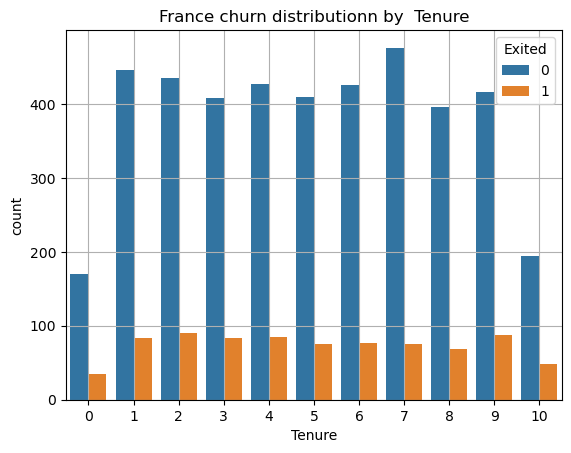

In [32]:
  
plt.title("France churn distributionn by  Tenure")
sns.countplot(x=france_data.Tenure, hue=france_data.Exited, data=france_data)
plt.grid()
plt.show()

visualization distribution for Spain 

In [33]:
spain_data = data[data['Geography'] == 'Spain'].copy() #copies data corresping to Spain

spain_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-45
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-45
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,30-45
11,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,15-30
14,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,30-45


In [34]:
spain_data.shape

(2477, 12)

In [35]:
spain_data[['Geography']].value_counts()

Geography
Spain        2477
dtype: int64

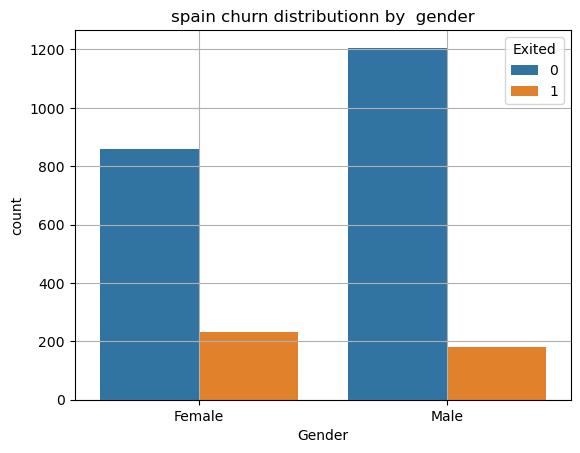

In [36]:
plt.title("spain churn distributionn by  gender")
sns.countplot(x=spain_data.Gender, hue=spain_data.Exited, data=spain_data)
plt.grid()
plt.show()

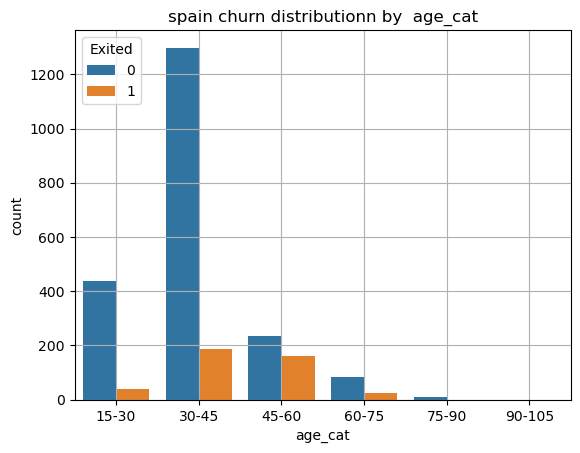

In [37]:

plt.title("spain churn distributionn by  age_cat")
sns.countplot(x=spain_data.age_cat, hue=spain_data.Exited, data=spain_data)
plt.grid()
plt.show()

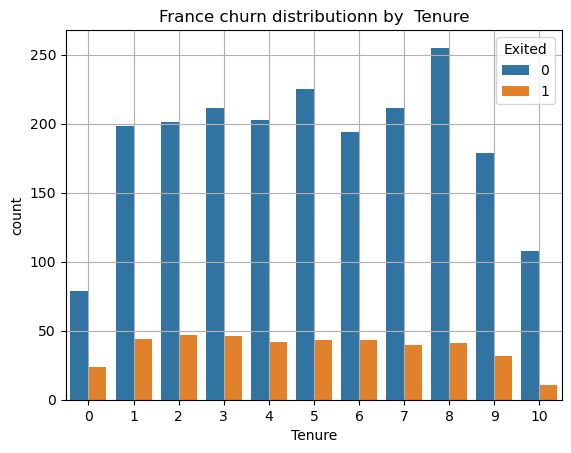

In [38]:
  
plt.title("France churn distributionn by  Tenure")
sns.countplot(x=spain_data.Tenure, hue=spain_data.Exited, data=spain_data)
plt.grid()
plt.show()

In [39]:
Germany_data = data[data['Geography'] == 'Germany'].copy() #copies data corresping to Germany

Germany_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cat
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,15-30
15,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,30-45
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,45-60
26,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,30-45
28,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,30-45


In [40]:
Germany_data.shape

(2509, 12)

In [41]:
Germany_data[['Geography']].value_counts()

Geography
Germany      2509
dtype: int64

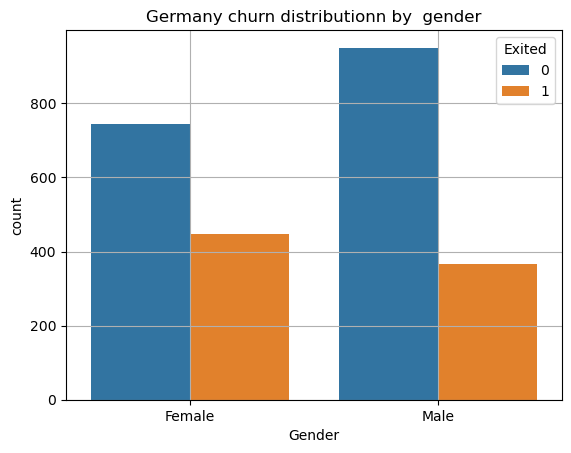

In [42]:
plt.title("Germany churn distributionn by  gender")
sns.countplot(x=Germany_data.Gender, hue=Germany_data.Exited, data=Germany_data)
plt.grid()
plt.show()

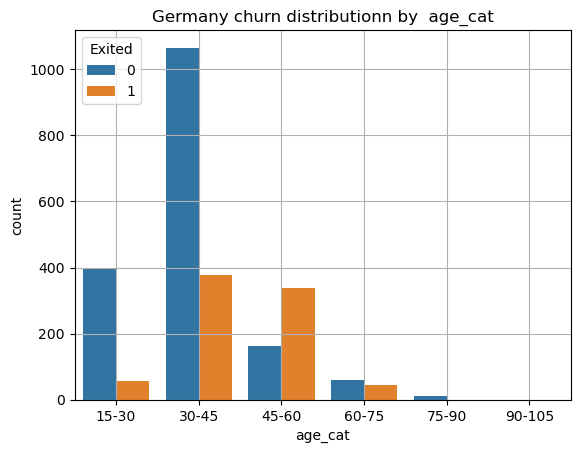

In [43]:

plt.title("Germany churn distributionn by  age_cat")
sns.countplot(x=Germany_data.age_cat, hue=Germany_data.Exited, data=Germany_data)
plt.grid()
plt.show()

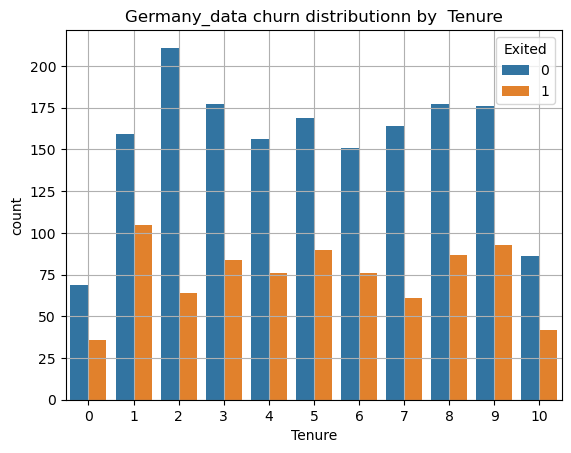

In [44]:
  
plt.title("Germany_data churn distributionn by  Tenure")
sns.countplot(x=Germany_data.Tenure, hue=Germany_data.Exited, data=Germany_data)
plt.grid()
plt.show()

## By Age

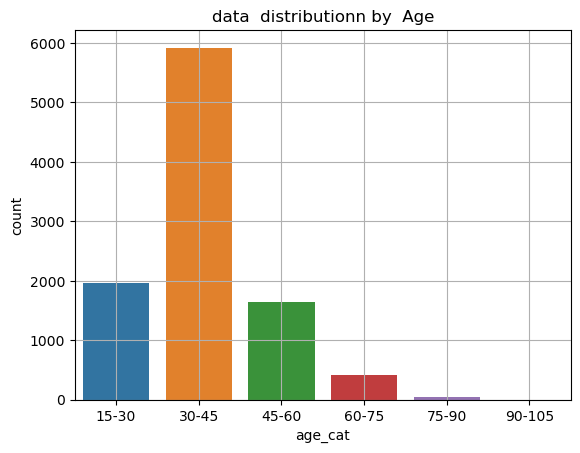

In [45]:
  
plt.title("data  distributionn by  Age")
sns.countplot(x=data.age_cat,  data=data)
plt.grid()
plt.show()

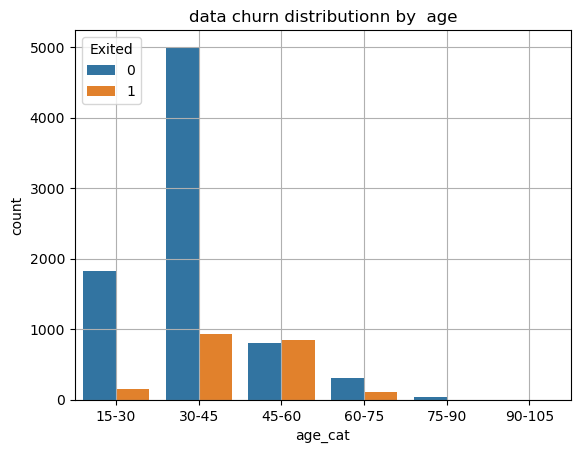

In [46]:
  
plt.title("data churn distributionn by  age")
sns.countplot(x=data.age_cat, hue=data.Exited, data=data)
plt.grid()
plt.show()

# modeling data for prediction

In [47]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Evaluation
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [48]:
pred_data=df.copy()

In [49]:
pred_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
pred_data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [51]:
pred_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
#this code adds additional column of binary variable of each of the category in each of the specified column.
data_update= pd.get_dummies(data=pred_data, columns=['Geography',  'NumOfProducts'])
data_update.head(10)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,Female,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,Female,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,Female,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,Female,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,Female,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0
5,645,Male,44,8,113755.78,1,0,149756.71,1,0,0,1,0,1,0,0
6,822,Male,50,7,0.00,1,1,10062.80,0,1,0,0,0,1,0,0
7,376,Female,29,4,115046.74,1,0,119346.88,1,0,1,0,0,0,0,1
8,501,Male,44,4,142051.07,0,1,74940.50,0,1,0,0,0,1,0,0
9,684,Male,27,2,134603.88,1,1,71725.73,0,1,0,0,1,0,0,0


In [53]:
onehot = OneHotEncoder(sparse=False)

data_update['Gender'] = onehot.fit_transform(data_update[["Gender"]]).astype('int64')
data_update.head(10)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,1,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,1,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,1,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,1,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,1,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0
5,645,0,44,8,113755.78,1,0,149756.71,1,0,0,1,0,1,0,0
6,822,0,50,7,0.00,1,1,10062.80,0,1,0,0,0,1,0,0
7,376,1,29,4,115046.74,1,0,119346.88,1,0,1,0,0,0,0,1
8,501,0,44,4,142051.07,0,1,74940.50,0,1,0,0,0,1,0,0
9,684,0,27,2,134603.88,1,1,71725.73,0,1,0,0,1,0,0,0


In [54]:
data_update[['Geography_Spain']].value_counts()

Geography_Spain
0                  7523
1                  2477
dtype: int64

In [55]:
data_update.shape

(10000, 16)

In [56]:
feature=data_update.copy()
feature.drop(columns = ['Exited'], axis=1, inplace=True)

In [57]:
feature.shape

(10000, 15)

In [58]:
target= data_update[['Exited']]

In [59]:
target.head()

,Exited
0,1
1,0
2,1
3,0
4,0


#### convert our parameters to an numpy array

In [60]:
feature=feature.values
target=target.values

In [61]:
from sklearn import preprocessing
feature = preprocessing.StandardScaler().fit(feature).transform(feature)
feature[0:5]

array([[-0.32622142,  1.09598752,  0.29351742, -1.04175968, -1.22584767,
         0.64609167,  0.97024255,  0.02188649,  0.99720391, -0.57873591,
        -0.57380915,  0.98333878, -0.92110197, -0.16530849, -0.0776931 ],
       [-0.44003595,  1.09598752,  0.19816383, -1.38753759,  0.11735002,
        -1.54776799,  0.97024255,  0.21653375, -1.00280393, -0.57873591,
         1.74273971,  0.98333878, -0.92110197, -0.16530849, -0.0776931 ],
       [-1.53679418,  1.09598752,  0.29351742,  1.03290776,  1.33305335,
         0.64609167, -1.03067011,  0.2406869 ,  0.99720391, -0.57873591,
        -0.57380915, -1.01694352, -0.92110197,  6.04929624, -0.0776931 ],
       [ 0.50152063,  1.09598752,  0.00745665, -1.38753759, -1.22584767,
        -1.54776799, -1.03067011, -0.10891792,  0.99720391, -0.57873591,
        -0.57380915, -1.01694352,  1.08565613, -0.16530849, -0.0776931 ],
       [ 2.06388377,  1.09598752,  0.38887101, -1.04175968,  0.7857279 ,
         0.64609167,  0.97024255, -0.36527578, 

In [62]:
train_x, test_x, train_y, test_y=train_test_split(feature, target, test_size=0.8, random_state=1)

print('feature train size is {} and feature test size is {}'.format(train_x.shape, test_x.shape))

feature train size is (2000, 15) and feature test size is (8000, 15)


## Defining a class for our classification models

In [63]:

class ClassificationModel:
    
    def __init__(self, train_x, train_y, test_x, test_y):
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.L_reg_model = None
        self.L_reg_pred = None
        self.L_reg_acc = None
        self.L_reg_MAE = None
        self.best_k = None
        self.knn_model = None
        self.k_f_pred = None
        self.k_f_acc = None
        self.knn_MAE = None
        self.Tree = None
        self.Tree_pred = None
        self.Tree_acc = None
        self.Tree_MAE = None
        self.L_reg_class_report= None
        self.knn_class_report= None
        self.Tree_class_report= None
        

    def train(self):
        # Logistic regression
        self.L_reg_model = LogisticRegression(C=1, random_state=0).fit(self.train_x, self.train_y)
        self.L_reg_pred = self.L_reg_model.predict(self.test_x)
        self.L_reg_acc = accuracy_score(self.test_y, self.L_reg_pred)
        self.L_reg_MAE = mean_absolute_error(self.test_y, self.L_reg_pred)
        self.L_reg_class_report=classification_report(self.test_y, self.L_reg_pred)

        # Initialize 20 values of k, from 1 to 20
        Ks = 20
        K_acc_list = np.zeros((Ks-1))
        for i in range(1, Ks):
            knn = KNeighborsClassifier(i).fit(self.train_x, self.train_y)
            knn_pred = knn.predict(self.test_x)
            K_acc_list[i-1] = accuracy_score(self.test_y, knn_pred)

        # Use the k with highest accuracy
        self.best_k = np.where(K_acc_list == K_acc_list.max())[0][0]

        self.knn_model = KNeighborsClassifier(self.best_k).fit(self.train_x, self.train_y)
        self.k_f_pred = self.knn_model.predict(self.test_x)
        self.k_f_acc = accuracy_score(self.test_y, self.k_f_pred)
        self.knn_MAE = mean_absolute_error(self.test_y, self.k_f_pred)
        self.knn_class_report=classification_report(self.test_y, self.k_f_pred)

        # Tree classification
        self.Tree = DecisionTreeClassifier(criterion="entropy", max_depth=4).fit(self.train_x, self.train_y)
        self.Tree_pred = self.Tree.predict(self.test_x)
        self.Tree_acc = accuracy_score(self.test_y, self.Tree_pred)
        self.Tree_MAE = mean_absolute_error(self.test_y, self.Tree_pred)
        self.Tree_class_report= classification_report(self.test_y, self.Tree_pred)

    def print_results(self):
        print('Linear regression accuracy is {} and MAE is {}'.format(self.L_reg_acc, self.L_reg_MAE))
        print('KNN accuracy is {} and MAE is {}'.format(self.k_f_acc, self.knn_MAE))
        print('Decision Tree accuracy is {} and MAE is {}'.format(self.Tree_acc, self.Tree_MAE))







### lets load our model

In [64]:
model= ClassificationModel(train_x, train_y, test_x, test_y)

### lets train our models

In [65]:
L_regression_model=model.train()

C:\Users\HP\Downloads\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Downloads\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\Downloads\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

### we can check our model resuls

In [66]:
model.print_results()

Linear regression accuracy is 0.838875 and MAE is 0.161125
KNN accuracy is 0.831625 and MAE is 0.168375
Decision Tree accuracy is 0.831 and MAE is 0.169


### access some of the class parameters

In [67]:
knn_class_report=model.knn_class_report
print(knn_class_report)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6361
           1       0.68      0.34      0.46      1639

    accuracy                           0.83      8000
   macro avg       0.76      0.65      0.68      8000
weighted avg       0.81      0.83      0.81      8000



In [68]:
knn_class_report=model.knn_class_report
print(knn_class_report)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6361
           1       0.68      0.34      0.46      1639

    accuracy                           0.83      8000
   macro avg       0.76      0.65      0.68      8000
weighted avg       0.81      0.83      0.81      8000



In [69]:
Tree_class_report=model.Tree_class_report
print(Tree_class_report)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6361
           1       0.68      0.34      0.45      1639

    accuracy                           0.83      8000
   macro avg       0.76      0.65      0.67      8000
weighted avg       0.81      0.83      0.81      8000



### we can access our L_regression_model

In [70]:
L_regression_model=model.L_reg_model
L_regression_model

LogisticRegression(C=1, random_state=0)

In [82]:
m= np.max(L_regression_model.coef_, 1)
m

array([0.72964396])